# **Driver-partner engagement analysis**

*by Riza Zainudin*

#### **Table of Contents**

- [Overview](#Overview)
- [System Setup Environment](#System-Setup-Environment)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Conclusion](#Conclusion)

#### **Objective**

Clean the raw data and then visualise the data using interactive charts and/or tables, illustrating the trend of engagement and members over time.

#### **System Setup Environment**
##### Import libraries

In [2]:
!pip install seaborn --quiet

In [3]:
#Data Manipulation

import pandas as pd
from IPython.display import display

#Data Calculation

import numpy as np
import math
import time
import datetime

#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

##### Load the data file
Most often we don't create data within our code but read it from external sources. Pandas has a large collection of importing (and corresponding exporting) functions available. We will read an Excel file.

In [4]:
data = pd.read_excel('Assignment.xlsx', sheet_name=1, header=0)
data.head()

,Unnamed: 0,Engagement,Unnamed: 2,Unnamed: 3,Members,Unnamed: 5,Unnamed: 6
0,Date,Posts,Comments,Reactions,Active members,Total members,NaN
1,2021-01-01 00:00:00,0,678,2756,25764,58267,NaN
2,2021-01-02 00:00:00,22,1330,3883,30577,58259,NaN
3,2021-01-03 00:00:00,63,1497,3269,28079,58252,NaN
4,2021-01-04 00:00:00,28,1719,3700,30958,58248,NaN


#### **Data Wrangling**
Formating the data frame header

In [5]:
new_header = data.iloc[0]       #grab the first row for the header
data = data[1:]                 #take the data less the header row
data.columns = new_header       #set the header row as the df header
data

,Date,Posts,Comments,Reactions,Active members,Total members,NaN
1,2021-01-01 00:00:00,0,678,2756,25764,58267,NaN
2,2021-01-02 00:00:00,22,1330,3883,30577,58259,NaN
3,2021-01-03 00:00:00,63,1497,3269,28079,58252,NaN
4,2021-01-04 00:00:00,28,1719,3700,30958,58248,NaN
5,2021-01-05 00:00:00,42,1321,2937,28560,58241,NaN
...,...,...,...,...,...,...,...
177,2021-06-26 00:00:00,0,833,2915,28322,66008,NaN
178,2021-06-27 00:00:00,13,548,1572,24212,66002,NaN
179,2021-06-28 00:00:00,35,1649,5238,35074,65997,NaN
180,2021-06-29 00:00:00,21,1172,3211,33600,66020,NaN


Let's drop column which all the values are Null

In [6]:
grab = data.dropna(how='all', axis=1)
grab.head()

,Date,Posts,Comments,Reactions,Active members,Total members
1,2021-01-01 00:00:00,0,678,2756,25764,58267
2,2021-01-02 00:00:00,22,1330,3883,30577,58259
3,2021-01-03 00:00:00,63,1497,3269,28079,58252
4,2021-01-04 00:00:00,28,1719,3700,30958,58248
5,2021-01-05 00:00:00,42,1321,2937,28560,58241


In [7]:
print(grab.shape)
print("\n")
print(grab.isnull().sum())

(181, 6)


0
Date              0
Posts             0
Comments          0
Reactions         0
Active members    0
Total members     0
dtype: int64


#### **Exploratory Data Analysis (EDA)**

Descriptive statistics summary

In [8]:
grab.describe()

,Date,Posts,Comments,Reactions,Active members,Total members
count,181,181,181,181,181,181
unique,181,85,175,179,179,170
top,2021-04-15 00:00:00,0,1335,5244,31965,58203
freq,1,14,3,2,2,2


In [9]:
grab.head(10)

,Date,Posts,Comments,Reactions,Active members,Total members
1,2021-01-01 00:00:00,0,678,2756,25764,58267
2,2021-01-02 00:00:00,22,1330,3883,30577,58259
3,2021-01-03 00:00:00,63,1497,3269,28079,58252
4,2021-01-04 00:00:00,28,1719,3700,30958,58248
5,2021-01-05 00:00:00,42,1321,2937,28560,58241
6,2021-01-06 00:00:00,33,1789,5447,30709,58238
7,2021-01-07 00:00:00,57,1774,4160,30878,58233
8,2021-01-08 00:00:00,9,1683,3688,30186,58230
9,2021-01-09 00:00:00,0,522,1264,21126,58224
10,2021-01-10 00:00:00,59,1425,2389,27487,58216


It seems that we can compute the non-active members, let's aggregate it in a new column.

In [10]:
grab['Non-active members'] = grab["Total members"]-grab["Active members"]
grab

,Date,Posts,Comments,Reactions,Active members,Total members,Non-active members
1,2021-01-01 00:00:00,0,678,2756,25764,58267,32503
2,2021-01-02 00:00:00,22,1330,3883,30577,58259,27682
3,2021-01-03 00:00:00,63,1497,3269,28079,58252,30173
4,2021-01-04 00:00:00,28,1719,3700,30958,58248,27290
5,2021-01-05 00:00:00,42,1321,2937,28560,58241,29681
...,...,...,...,...,...,...,...
177,2021-06-26 00:00:00,0,833,2915,28322,66008,37686
178,2021-06-27 00:00:00,13,548,1572,24212,66002,41790
179,2021-06-28 00:00:00,35,1649,5238,35074,65997,30923
180,2021-06-29 00:00:00,21,1172,3211,33600,66020,32420


##### Data Vizualisations

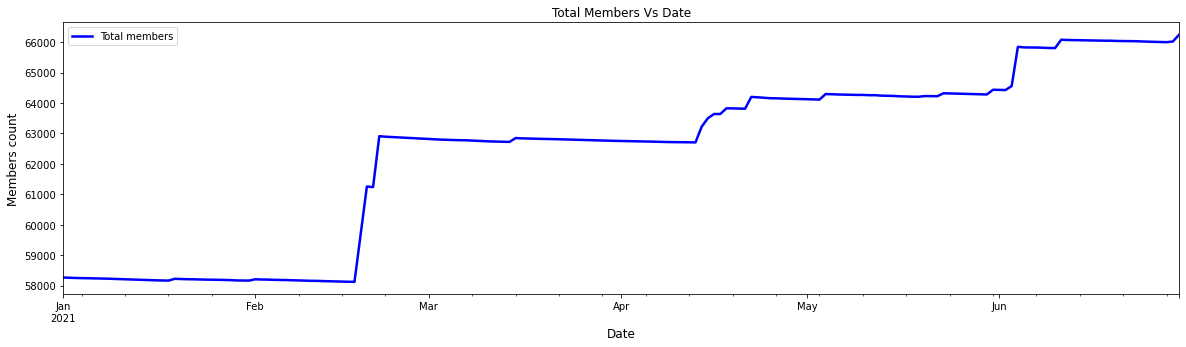

In [11]:
plt.figure(figsize=(20,5)) 
grab.set_index('Date')['Total members'].plot(linewidth=2.5, color = 'blue')
plt.title('Total Members Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Members count', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


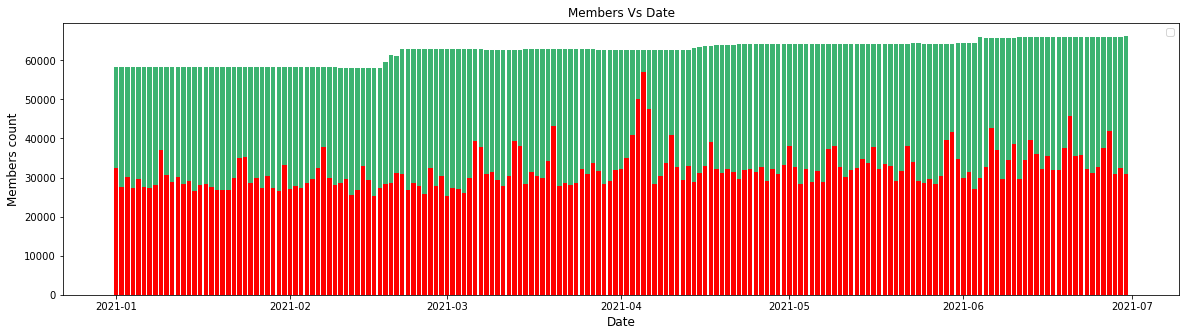

In [12]:
plt.figure(figsize=(20,5)) 

plt.bar(grab['Date'], grab['Non-active members'], color='red')
plt.bar(grab['Date'], grab['Active members'], bottom=grab['Non-active members'], color='mediumseagreen')
plt.title('Members Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Members count', fontsize=12)
plt.legend()
plt.show()

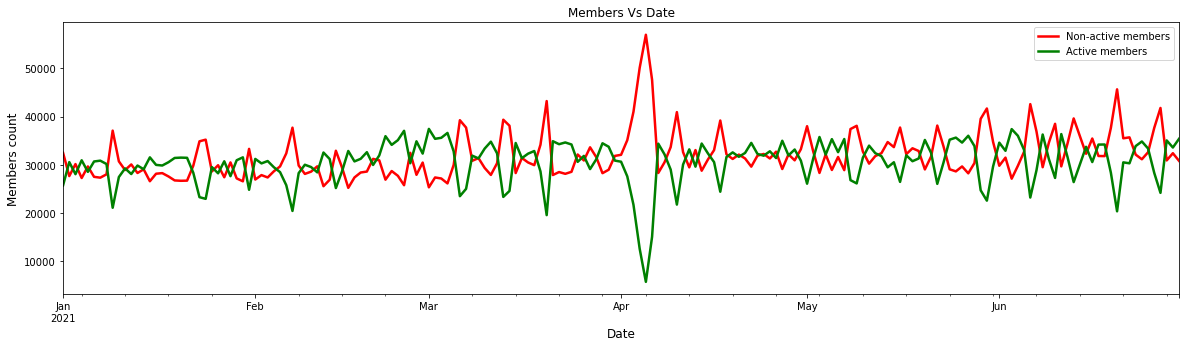

In [13]:
grab.set_index('Date')['Non-active members'].plot(figsize=(20, 5), linewidth=2.5, color = 'red', label = "Non-active members")
grab.set_index('Date')['Active members'].plot(figsize=(20, 5), linewidth=2.5, color = 'green', label = "Active members")
plt.title('Members Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Members count', fontsize=12)
plt.legend()
plt.show()

In [ ]:
grab.set_index('Date')['Non-active members'].plot(figsize=(20, 5), linewidth=2.5, color = 'red', label = "Non-active members")
grab.set_index('Date')['Active members'].plot(figsize=(20, 5), linewidth=2.5, color = 'green', label = "Active members")
plt.title('Members Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Members count', fontsize=12)
plt.legend()
plt.show()

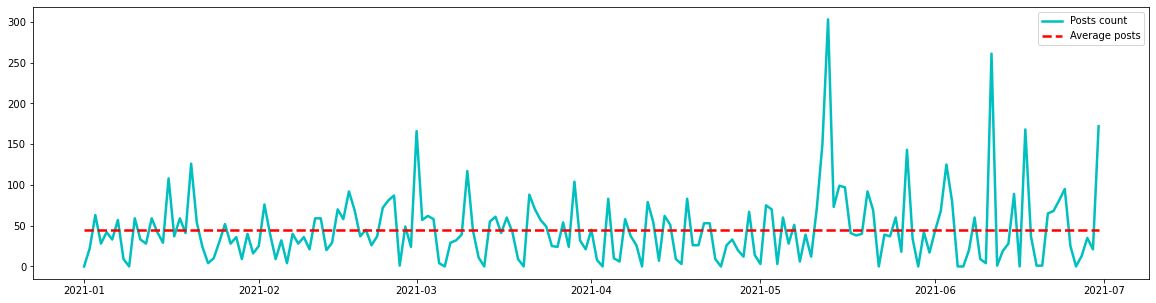

In [36]:
avg_posts = [np.mean(grab['Posts'])] * len(grab['Posts'])

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(grab['Date'], grab['Posts'], color = 'c', linewidth=2.5, label='Posts count')
ax.plot(grab['Date'], avg_posts, color='red',linewidth=2.5, linestyle='--', label="Average posts")

plt.legend()
plt.show()

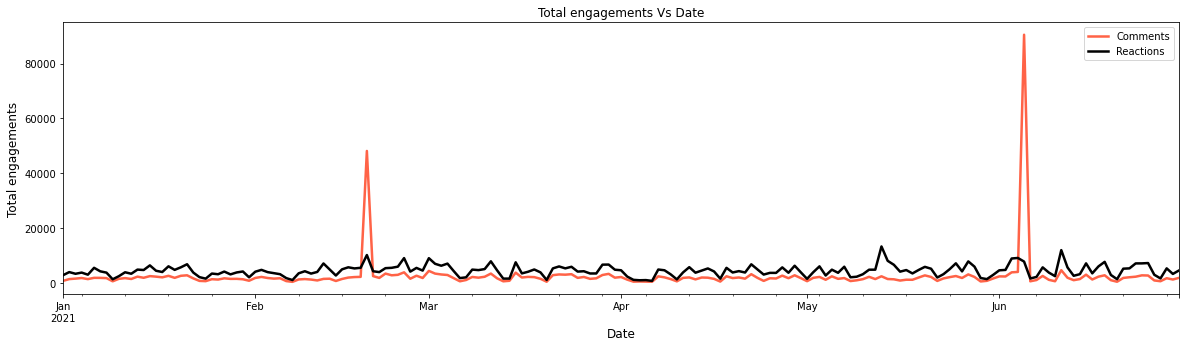

In [38]:
plt.figure(figsize=(20,5)) 

grab.set_index('Date')['Comments'].plot(linewidth=2.5, color = 'tomato', label = "Comments")
grab.set_index('Date')['Reactions'].plot(linewidth=2.5, color = 'black', label = "Reactions")
plt.title('Total engagements Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total engagements', fontsize=12)

plt.legend()
plt.show()

It seems that there are outliers in grab['Comments'] dataframe. We can see obviously the threshold of comment engagement will not go beyond above the reactions curve. Let's find when is it happended. Let's find the mean and median for that particular data column. 

In [16]:
grab[(grab["Comments"] > 40000)]

,Date,Posts,Comments,Reactions,Active members,Total members,Non-active members
50,2021-02-19 00:00:00,37,48106,10109,32633,61256,28623
156,2021-06-05 00:00:00,0,90528,7722,33108,65826,32718


In [44]:
print("average:",grab["Comments"].mean())
print("median:",grab["Comments"].median())

average: 2492.1436464088397
median: 1719.0


Now, let's replace the value with its median.

In [55]:
grab = grab.replace(to_replace =[48106	, 90528], 
                        value =1719)

In [56]:
grab[(grab["Comments"] > 40000)]

,Date,Posts,Comments,Reactions,Active members,Total members,Non-active members


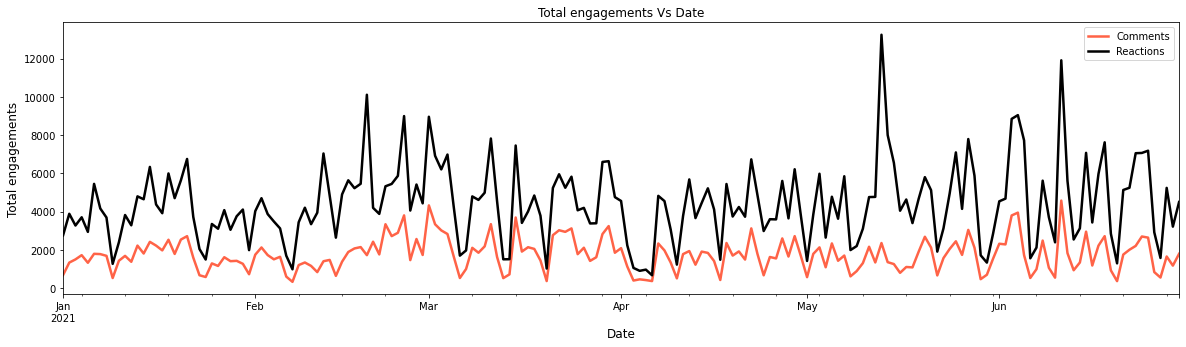

In [57]:
plt.figure(figsize=(20,5)) 

grab.set_index('Date')['Comments'].plot(linewidth=2.5, color = 'tomato', label = "Comments")
grab.set_index('Date')['Reactions'].plot(linewidth=2.5, color = 'black', label = "Reactions")
plt.title('Total engagements Vs Date', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total engagements', fontsize=12)

plt.legend()
plt.show()

Conclusion: It seems pretty logic and normal to give more reactions since just cllicking the like button than to write a comment.

Let's extract the clean dataframe for reporting in Tableau.

In [58]:
grab.to_csv('grab.csv', index=False)